In [1]:
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
## Interacting with LLMs
import os
from langchain.chat_models import init_chat_model

model_name = os.getenv('MODEL_NAME')
model_provider = os.getenv('MODEL_PROVIDER')

In [5]:
llm = init_chat_model(model=model_name, model_provider=model_provider)

c:\tmp\agentic_ai\Agentic_AI\langgraph\mailtoner\.venv\Lib\site-packages\google\cloud\aiplatform\models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


In [8]:
llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 8, 'total_token_count': 15, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 8}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0063854241743683815, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--406be119-6adc-4156-b0d2-cca00c860808-0', usage_metadata={'input_tokens': 7, 'output_tokens': 8, 'total_tokens': 15, 'input_token_details': {'cache_read': 0}})

In [9]:
## Messages
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage("You are an expert in Gen AI"),
    HumanMessage("How to find complexity of a program?")
]

In [12]:
response = llm.invoke(messages)

In [13]:
type(response)

langchain_core.messages.ai.AIMessage

In [14]:
print(response.content)

Understanding the complexity of a program is crucial for optimizing its performance, predicting its resource usage, and making informed design choices. When we talk about program complexity, we're primarily referring to **time complexity** and **space complexity**.

Here's a breakdown of how to find the complexity of a program:

## 1. Understanding Big O Notation

The standard way to express program complexity is using **Big O notation**. It describes the upper bound of the growth rate of an algorithm's resource usage (time or space) as the input size grows. It focuses on the dominant term and ignores constant factors and lower-order terms, as they become insignificant for large inputs.

Here are some common Big O complexities, from best to worst:

*   **O(1) - Constant Time:** The time/space taken does not depend on the input size.
    *   Example: Accessing an element in an array by its index.
*   **O(log n) - Logarithmic Time:** The time/space increases logarithmically with the inpu

In [15]:
response.pretty_print()

================================== Ai Message ==================================

Understanding the complexity of a program is crucial for optimizing its performance, predicting its resource usage, and making informed design choices. When we talk about program complexity, we're primarily referring to **time complexity** and **space complexity**.

Here's a breakdown of how to find the complexity of a program:

## 1. Understanding Big O Notation

The standard way to express program complexity is using **Big O notation**. It describes the upper bound of the growth rate of an algorithm's resource usage (time or space) as the input size grows. It focuses on the dominant term and ignores constant factors and lower-order terms, as they become insignificant for large inputs.

Here are some common Big O complexities, from best to worst:

*   **O(1) - Constant Time:** The time/space taken does not depend on the input size.
    *   Example: Accessing an element in an array by its index.
*   **O(l

In [16]:
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate

In [18]:
prompt = PromptTemplate.from_template("You are an expert in {area}. Explain in three sentences what is {topic}")

In [20]:
prompt.invoke({'area':'Physics', 'topic': 'Inertia'})

StringPromptValue(text='You are an expert in Physics. Explain in three sentences what is Inertia')

In [21]:
chain = prompt | llm

In [22]:
response = chain.invoke({'area':'Physics', 'topic': 'Inertia'})

In [25]:
response.pretty_print()

================================== Ai Message ==================================

Inertia is the inherent property of an object to resist any change in its state of motion. This means an object at rest will stay at rest, and an object in motion will continue to move with constant velocity, unless acted upon by an external force. The greater an object's mass, the greater its inertia, making it harder to start moving or change its current motion.


In [38]:
prompt = ChatPromptTemplate([
    ("system", "You are an expert in {area}. Explain the question in simple English"),
    ("user", "What is {topic}?")
])

In [39]:
chain = prompt | llm

In [40]:
response = chain.invoke({'area': 'Gen AI', 'topic': 'Agentic AI'})

In [41]:
response.pretty_print()

================================== Ai Message ==================================

Imagine you have a super smart assistant that can not only do what you ask, but can also **think for itself** to figure out the best way to get things done. That's basically what **Agentic AI** is all about.

Here's a breakdown in simple terms:

*   **Think of it like a "smart agent":** Instead of just following a strict set of instructions, an agentic AI can:
    *   **Understand your goal:** You tell it what you want to achieve, not necessarily every single step.
    *   **Plan:** It figures out a sequence of actions needed to reach that goal.
    *   **Execute:** It takes those actions, using its knowledge and tools.
    *   **Reason and Adapt:** If something goes wrong or a better way appears, it can adjust its plan and try again.
    *   **Learn (sometimes):** It can get better at its tasks over time.

*   **It's more than just a chatbot:** While a chatbot might answer your questions, an agentic AI c

In [42]:
response = chain.invoke({'area': 'Gen AI', 'topic': 'RAG'})

In [43]:
response.pretty_print()

================================== Ai Message ==================================

Imagine you're trying to answer a question, but you don't have all the information in your head. You know where to look for it, though – maybe in a specific book or a set of documents.

**RAG (Retrieval-Augmented Generation)** is like that for AI.

Here's a breakdown in simple terms:

*   **The "R" (Retrieval):** This is like the AI going to a library or a specific folder of documents to **find relevant information** that might help answer your question. It's searching through a collection of data to pull out the most useful pieces.
*   **The "A" (Augmented):** Once the AI finds that information, it **"augments"** or adds that retrieved information to its own knowledge. It's like you reading a paragraph from a book to better understand a topic before you try to explain it.
*   **The "G" (Generation):** Now, with the extra information it just found, the AI can **generate a more informed and accurate answer

### Conditional Edges

In [2]:
from typing import TypedDict, Literal
from langgraph.graph import START, END, StateGraph

In [3]:
class Math(TypedDict):
    a: int
    b: int
    oprn: Literal["add", "subtract", "multiply", "divide"]
    result: int

In [24]:
def add(state:Math) -> Math:
    state['result'] = state['a'] + state['b']
    return state

In [30]:
def subtract(state: Math) -> Math:
    state['result'] = state['a'] - state['b']
    return state

In [31]:
def multiply(state: Math) -> Math:
    state['result'] = state['a'] * state['b']
    return state

In [32]:
def divide(state: Math) -> Math:
    state['result'] = state['a'] // state['b']
    return state

In [33]:
def route(state: Math) -> Literal["Addition", "Subtraction", "Multiplication", "Division"]:
    if state['oprn'] == "add":
        return "Addition"
    elif state['oprn'] == "subtract":
        return "Subtraction"
    elif state['oprn'] == "multiply":
        return "Multiplication"
    else:
        return "Division"

In [34]:
math_graph = StateGraph(Math)
math_graph.add_node("Addition", add)
math_graph.add_node("Subtraction", subtract)
math_graph.add_node("Multiplication", multiply)
math_graph.add_node("Division", divide)
math_graph.add_conditional_edges(START, route)
math_graph.add_edge("Addition", END)
math_graph.add_edge("Subtraction", END)
math_graph.add_edge("Multiplication", END)
math_graph.add_edge("Division", END)

In [35]:
graph = math_graph.compile()

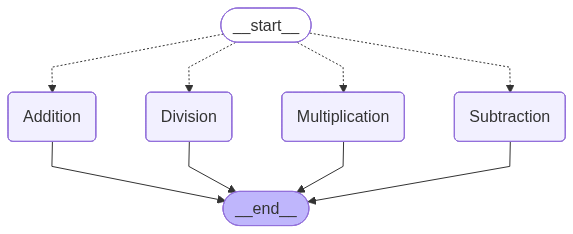

In [36]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [37]:
state = Math(a = 10, b = 5, oprn = 'add')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'add', 'result': 15}


In [38]:
state = Math(a = 10, b = 5, oprn = 'subtract')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'subtract', 'result': 5}


In [39]:
state = Math(a = 10, b = 5, oprn = 'multiply')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'multiply', 'result': 50}


In [40]:
state = Math(a = 10, b = 5, oprn = 'divide')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'divide', 'result': 2}


#### Method 2 - Boolean 

In [41]:
class New_Math(TypedDict):
    a: int
    b: int
    oprn: Literal["add", "subtract"]
    result: int

In [42]:
def is_add(state:New_Math) -> bool:
    if state['oprn'] == "add":
        return True
    else:
        return False

In [43]:
new_math_graph = StateGraph(New_Math)
new_math_graph.add_node("Addition", add)
new_math_graph.add_node("Subtraction", subtract)
new_math_graph.add_conditional_edges(
    START, 
    is_add,
    {True: 'Addition', False: 'Subtraction'}
)
new_math_graph.add_edge("Addition", END)
new_math_graph.add_edge("Subtraction", END)


In [44]:
new_graph = new_math_graph.compile()

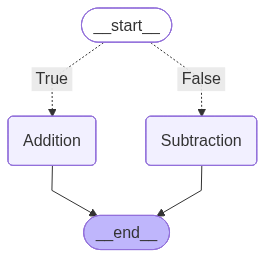

In [45]:
display(Image(new_graph.get_graph().draw_mermaid_png()))

In [48]:
state = New_Math(a = 5, b = 3, oprn = 'add')
result = new_graph.invoke(state)
print(result)

{'a': 5, 'b': 3, 'oprn': 'add', 'result': 8}


#### Method 3 - Lambda

In [50]:
f = lambda s: "Addition" if s['oprn'] == 'add' else "Subtraction"

In [53]:
f(New_Math(oprn = 'add'))

'Addition'

In [54]:
new_math_graph = StateGraph(New_Math)
new_math_graph.add_node("Addition", add)
new_math_graph.add_node("Subtraction", subtract)
new_math_graph.add_conditional_edges(
    START, 
    lambda s: "Addition" if s['oprn'] == 'add' else "Subtraction")
new_math_graph.add_edge("Addition", END)
new_math_graph.add_edge("Subtraction", END)


In [55]:
new_graph = new_math_graph.compile()

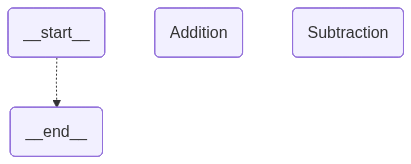

In [56]:
display(Image(new_graph.get_graph().draw_mermaid_png()))

In [57]:
new_math_graph = StateGraph(New_Math)
new_math_graph.add_node("Addition", add)
new_math_graph.add_node("Subtraction", subtract)
new_math_graph.add_conditional_edges(
    START, 
    lambda s: True if s['oprn'] == 'add' else False,
    {
        True: 'Addition',
        False: 'Subtraction'
    })
new_math_graph.add_edge("Addition", END)
new_math_graph.add_edge("Subtraction", END)

In [58]:
new_graph = new_math_graph.compile()

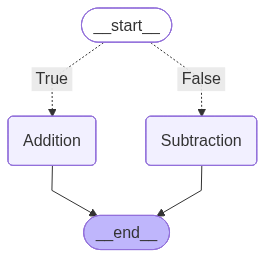

In [59]:
display(Image(new_graph.get_graph().draw_mermaid_png()))

In [63]:
state = Math(a=10, b=5, oprn='subtract')
result = new_graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'subtract', 'result': 5}


In [62]:
state = Math(a=10, b=5, oprn='add')
result = new_graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'oprn': 'add', 'result': 15}
